# Sentiment Analysis from Tweets

This project aims to implement functions for a text classifier, which is train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test data using Support Vector Machines (SVM) on tweet data. 
The objective is to **categorize tweets as positive or negative sentiments**, utilizing the principles covered in Lectures on Text Classification.


In [69]:
import csv # csv reader
from sklearn.svm import LinearSVC
!pip install nltk
import nltk
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import regex as re

In [70]:
def load_data(path):
    #Load data from a tab-separated file and append it to raw_data.

    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    #Split the data between train_data and test_data according to the percentage and performs the preprocessing.
    #Determines the number of samples in the "raw_data" list.
    num_samples = len(raw_data) 
    #Calculates the number of samples designated for training based on the given percentage.
    num_training_samples = int((percentage * num_samples)) 
    #Iterates through the raw_data, Appends a tuple containing the processed text as a feature vector and its corresponding label to the train_data and test_data list.
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Input and Basic preprocessing

Start by implementing the parse_data_line() and the pre_process() functions. Given a line of a tab-separated text file, parse_data_line() should return a tuple containing the label and text. The simple pre_process() function should turn a text (a string) into a list of tokens (words).

In [71]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just positive or negative and the statement
    # e.g. (label, statement)
        label = []
        statement = []
        label = data_line[1]
        statement = data_line[2]
        return (label, statement)

In [72]:
# Input: a string of one statement
def pre_process(text):
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    # word tokenisation

    #Punctuation removal 
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text) # separates punctuation at ends of strings
    text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text) # separates punctuation at beginning of strings
    #print("tokenising:", text)
    tokens = re.split(r"\s+",text)
    # normalisation - only by lower casing for now
    tokens = [t.lower() for t in tokens]
    return tokens

#Test 
pre_process("London is the historical place to visit, You should visit once. ")

['london',
 'is',
 'the',
 'historical',
 'place',
 'to',
 'visit',
 ',',
 'you',
 'should',
 'visit',
 'once',
 '.',
 '']

**Explanation:**

parse_data_line() function takes a tab-separated line (data_line) and splits it into the label and statements (text content) assuming they are separated by tabs

pre_process(text), takes in a string of text as its input. further more after punctuation separation, the text is tokenized into list of tokens, and convert all tokens to lowercase using list comprehension.

# Basic Feature Extraction

**Simple feature extraction.**


The next step is to implement the to_feature_vector() function. Given a preprocessed text (that is, a list of tokens), it will return a Python dictionary that has as its keys the tokens/words, and for the values a weight for each of those tokens in the preprocessed texts.
The weight could simply be 1 for each word, or the number of occurrences of a token in the preprocessed text (i.e. a bag-of-words representation), or it could give more weight to specific words.
While building up this feature vector, you may want to incrementally build up the global global_feature_dict, which should be a list or dictionary that keeps track of all the tokens/feature names which appear in the whole dataset.
While a global feature dictionary is not strictly required for this coursework, it will help you understand which features (and how many!) you are using to train your classifier and can help understand possible performance issues you encounter on the way.



**Hint: you can start by using binary feature values; 1 if the feature is present, by default the sklearn learn vectorization function will give it 0 if it’s not.**

In [73]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    feature_vector = {} # A Local dictionary of features 
    for token in tokens:
        global_feature_dict[token] = 0
        feature_vector[token] = 1
        
    return feature_vector

In [74]:
tokkens = pre_process('I love my india')
to_feature_vector(tokkens)

{'i': 1, 'love': 1, 'my': 1, 'india': 1}

**Explanation**

The to_feature_vector() function primarily populates two dictionaries:

global_feature_dict: A global dictionary maintaining all unique tokens in the dataset and updates this dictionary by adding tokens as keys.

feature_vector: A local dictionary representing the features of a specific text and It assigns 1 to each token which is present in tokens list.

In [75]:
# TRAINING AND VALIDATING OUR CLASSIFIER
 
def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Cross-validation

**Cross-validation on training data.**


Using the load_data() function already present in the template file, you are now ready to process the texts for sentiment analysis. In order to train a good classifier, finish the implementation of the cross_validate() function to do a 10-fold cross validation on the training data (leave the test data split of 20% alone for now). Make use of the given functions train_classifier() and predict_labels() to do the cross-validation. Make sure that your program stores the precision, recall, f1 score, and accuracy of your classifier in a variable cv_results, which should contain average scores for all folds and be returned by this function.


**Hint: the package sklearn.metrics contains many utilities for evaluation metrics - you could try precision, recall, fscore, support to start with.**




In [76]:
#solution
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def cross_validate(dataset, folds):
    #print(dataset)
    print(folds)
    
    results = []
    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
       
        # Split the dataset into training and testing sets
        
        test_data_cv = dataset[ i: i + fold_size]
        train_data_cv = dataset[:i] + dataset[i + fold_size:]

        res = [label for text, label in train_data_cv if label == 'positive']
        print(len(res))
        res = [label for text, label in train_data_cv if label == 'negative']
        print(len(res))
        print(test_data_cv[4])
        
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
       
        # Extract features (X) and labels (y) from the training and testing sets

        X_train_cv = [text for text, label in train_data_cv]
        y_train_cv = [label for text, label in train_data_cv]
        X_test_cv = [text for text, label in test_data_cv]
        y_test_cv = [label for text, label in test_data_cv]

        
        
        # Train the classifier

        classifier = train_classifier(list(zip(X_train_cv, y_train_cv)))
 
        # Predict labels for the test set

        y_pred = [classifier.classify(text) for text in X_test_cv]
 
        # Evaluate performance metrics

        precision = precision_score(y_test_cv, y_pred, average='weighted')
        recall = recall_score(y_test_cv, y_pred, average='weighted')
        f1 = f1_score(y_test_cv, y_pred, average='weighted')
        accuracy = accuracy_score(y_test_cv, y_pred)

        # Store results for this fold
        results.append({
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'accuracy': accuracy
        })
    cv_results = {
        'precision': sum(result['precision'] for result in results) / len(results),
        'recall': sum(result['recall'] for result in results) / len(results),
        'f1_score': sum(result['f1'] for result in results) / len(results),
        'accuracy': sum(result['accuracy'] for result in results) / len(results),
          } 
    return cv_results

In [77]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    #Assuming preprocessed samples, return their predicted labels from the classifier model.
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    #Assuming raw text, return its predicted label from the classifier model.
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [78]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
64640


In [79]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

10
15683
8465
({'so': 1, 'fidel': 1, 'castro': 1, 'has': 1, 'died': 1, '.': 1, 'don': 1, "'": 1, 't': 1, 'worry': 1, ',': 1, 'george': 1, 'soros': 1, 'is': 1, 'willing': 1, 'to': 1, 'fill': 1, 'his': 1, 'shoes': 1, 'as': 1, 'most': 1, 'wicked': 1, 'man': 1, 'in': 1, 'the': 1, 'world': 1, '#wicked': 1, '#publicenemy1': 1}, 'negative')
Fold start on items 0 - 2684
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15458
8690
({'let': 1, "'": 1, 's': 1, 'make': 1, 'sure': 1, 'our': 1, '@berlingeekettes': 1, 'get': 1, 'to': 1, 'sxsw': 1, '!': 1, 'vote': 1, 'here': 1, 'by': 1, 'nov': 1, '2nd': 1, 'http': 1, '://t': 1, '.': 1, 'co/zadgrkqg': 1}, 'positive')
Fold start on items 2684 - 5368
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15910
8238
({'there': 1, "'": 1, 's': 1, 'something': 1, 'about': 1, 'friday': 1, 'night': 1, 'lights': 1, ',': 1, 'you': 1, 'just': 1, 'get': 1, 'chills': 1, 'thinking': 1, 'it': 1, '.': 1}, 'positive')
Fold start on items 5368 - 8052
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


16195
7953
({'i': 1, 'liked': 1, 'a': 1, '@youtube': 1, 'video': 1, 'from': 1, '@pressresetearth': 1, 'https': 1, '://t': 1, '.': 1, 'co/0snwsndbql': 1, 'watch': 1, 'me': 1, 'troll': 1, 'the': 1, 'young': 1, 'turks': 1, 'at': 1, 'trump': 1, 'protest': 1, 'in': 1, 'nyc': 1, '(': 1, 'excerpt': 1}, 'positive')
Fold start on items 8052 - 10736
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15786
8362
({'trying': 1, 'to': 1, 'finish': 1, 'reading': 1, 'paper': 1, 'towns': 1, 'so': 1, 'that': 1, 'i': 1, 'can': 1, 'go': 1, 'see': 1, 'the': 1, 'movie': 1, 'tomorrow': 1, '!': 1}, 'positive')
Fold start on items 10736 - 13420
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15796
8352
({'so': 1, 'here': 1, 'we': 1, 'go': 1, 'into': 1, 'the': 1, 'early': 1, 'hours': 1, 'with': 1, 'hopefully': 1, 'some': 1, 'great': 1, 'racing': 1, 'from': 1, 'san': 1, 'fran': 1, '#americascup': 1, 'world': 1, 'series': 1, '.': 1, 'watch': 1, 'it': 1, 'fri': 1, '0930': 1, 'on': 1, 'ss4': 1, '...': 1}, 'positive')
Fold start on items 13420 - 16104
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15763
8385
({'tyrann': 1, 'mathieu': 1, 'may': 1, 'have': 1, 'fucked': 1, 'up': 1, 'his': 1, 'career': 1, 'we': 1, 'know': 1, 'jordan': 1, 'jefferson': 1, 'bum': 1, 'ass': 1, 'did': 1, 'cuz': 1, 'he': 1, 'can': 1, "'": 1, 't': 1, 'throw': 1, 'smh': 1, '.': 1}, 'negative')
Fold start on items 16104 - 18788
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15773
8375
({'thank': 1, 'you': 1, 'jack': 1, 'and': 1, 'for': 1, 'putting': 1, 'out': 1, 'calibraska': 1, 'tomorrow': 1, 'when': 1, 'i': 1, "'": 1, 'm': 1, 'fucking': 1, 'broke': 1}, 'negative')
Fold start on items 18788 - 21472
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15775
8373
({'hackers': 1, 'have': 1, 'already': 1, 'defeated': 1, 'windows': 1, '8': 1, ',': 1, 'and': 1, 'readwrite': 1, 'mobile': 1, 'ranked': 1, 'it': 1, '5th': 1, 'in': 1, 'interface': 1, 'design': 1, 'behind': 1, 'ios': 1, 'android': 1, '.': 1}, 'negative')
Fold start on items 21472 - 24156
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


15802
8354
({'wonder': 1, 'how': 1, 'it': 1, 'feels': 1, 'like': 1, 'to': 1, 'be': 1, 'paul': 1, 'mccartney': 1, '.': 1, 'on': 1, 'throw': 1, 'back': 1, 'thursday': 1, 'does': 1, 'he': 1, 'look': 1, 'and': 1, 'marvel': 1, 'at': 1, 'the': 1, 'time': 1, 'was': 1, 'a': 1, 'beatle': 1, '?': 1}, 'positive')
Fold start on items 24156 - 26840
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'precision': 0.8470426013416799,
 'recall': 0.848318441342039,
 'f1_score': 0.8473022431744743,
 'accuracy': 0.848318441342039}

# Error Analysis 

**Error analysis.**

Look at the performance of the classes using a confusion matrix through the method provided confusion_matrix_heatmap() to see what the balance of false positives and false negatives is for the positive and negative labels.

Carry out an error analysis on a simple train-test split of the training data (e.g. the first fold from your cross-validation function). For this you should print out (or better, print to file) all the false positives and false negatives for the positive label to try to understand why the classifier is not getting these correct and write in your report some observations and examples of where it is getting confused.

**Hint: see Lab 2.**

Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


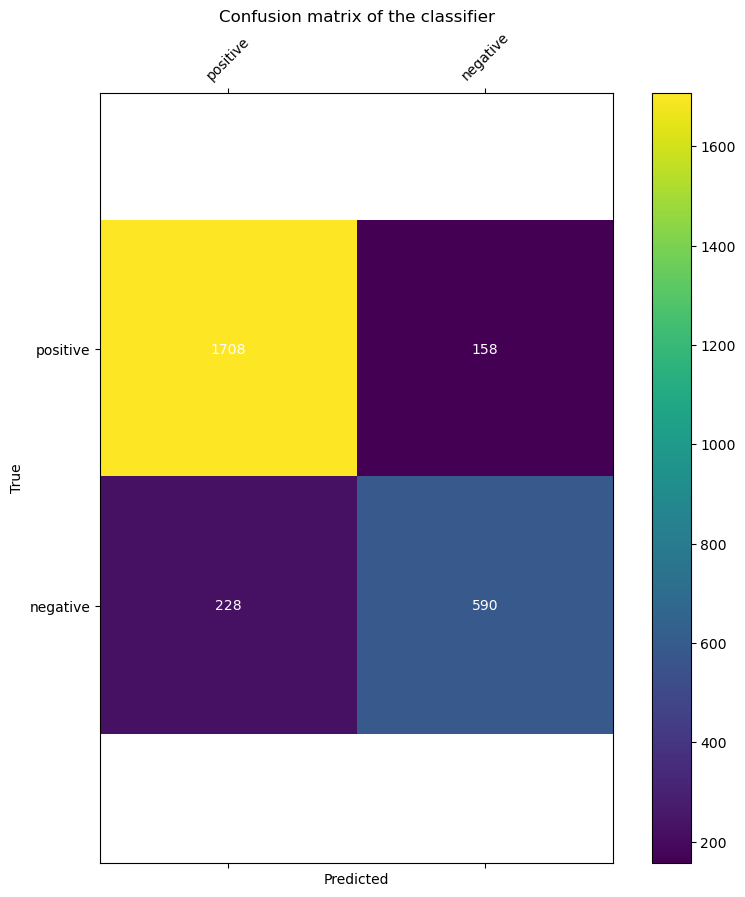

2684
2684
2684
 False Positive & False Negative for 
 {'juan': 1, 'just': 1, 'heard': 1, 'green': 1, 'day': 1, "'": 1, 's': 1, 'time': 1, 'of': 1, 'our': 1, 'life': 1, 'for': 1, 'the': 1, '1st': 1, 'since': 1, 'leaving': 1, 'florida': 1, 'and': 1, 'i': 1, 'burst': 1, 'into': 1, 'tears': 1, '.': 1, 'miss': 1, 'everyone': 1, '...': 1, 'kellogg': 1} 
 Actual: negative, Predicted: positive
 False Positive & False Negative for 
 {'@chelereamey': 1, '@funder': 1, '@zeldashagnasty': 1, '@fbi': 1, '@thejusticedept': 1, 'yes': 1, 'i': 1, 'know': 1, 'but': 1, 'comey': 1, 'should': 1, 'be': 1, 'pressured': 1, 'for': 1, 'further': 1, 'explanation': 1, 'about': 1, 'letter': 1, '.': 1} 
 Actual: negative, Predicted: positive
 False Positive & False Negative for 
 {'@richarddawkins': 1, 'just': 1, 'like': 1, 'christians': 1, 'with': 1, 'their': 1, 'bible': 1, ',': 1, 'americans': 1, 'are': 1, 'cherry': 1, 'picking': 1, 'the': 1, '2nd': 1, 'amendment': 1, '.': 1, '#gunsense': 1} 
 Actual: negative, Pr

In [80]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()



# Split the dataset into training and testing sets
test_data_ = train_data[ 0:2684]
train_data_ = train_data[:0] + train_data[2684:]

# print("Fold start on items %d - %d" % (i, i+fold_size))
# FILL IN THE METHOD HERE

# Extract features (X) and labels (y) from the training and testing sets

X_train_EA = [text for text, label in train_data_]
y_train_EA = [label for text, label in train_data_]
X_test_EA = [text for text, label in test_data_]
y_test_EA = [label for text, label in test_data_]

      
# Train the classifier

classifier = train_classifier(list(zip(X_train_EA, y_train_EA)))

# Predict labels for the test set

y_pred_EA = [classifier.classify(text) for text in X_test_EA]

# Evaluate performance metrics

precision = precision_score(y_test_EA, y_pred_EA, average='weighted')
recall = recall_score(y_test_EA, y_pred_EA, average='weighted')
f1 = f1_score(y_test_EA, y_pred_EA, average='weighted')
accuracy = accuracy_score(y_test_EA, y_pred_EA)

confusion_matrix_heatmap(y_test_EA, y_pred_EA, labels=['positive', 'negative'])

print(len(X_test_EA))
print(len(y_test_EA))
print(len(y_pred_EA))


#False Positive and False Negative 

rows_of_csv = []
for text, label, pred_label in zip(X_test_EA, y_test_EA, y_pred_EA):
    if pred_label == label: 
        continue

    #true text, true label, predicted level 
    print(" False Positive & False Negative for \n {} \n Actual: {}, Predicted: {}".format(text, label, pred_label))
    rows_of_csv.append([label, pred_label, text])

with open("Sentiment_FN_FP.csv", mode='w', newline='') as file:
    write = csv.writer(file)

    for row in rows_of_csv:
        write.writerow(row)


# Optimising pre-processing and feature extraction 

**Optimising pre-processing and feature extraction. Now that you have the numbers for accuracy of your classifier and have done some initial error analysis, think of ways to improve this performance score. Some ideas as to how to do this:**

• Improve the preprocessing. Which tokens might you want to throw out or preserve?

• What about punctuation? Do not forget normalisation, lemmatising, stop word removal - what aspects of this might be useful?

• Think about the features: what could you use other than unigram tokens? It may be useful to look beyond single words to combinations of words or characters. Also the feature weighting scheme: what could you do other than using binary values?

• You could add extra stylistic features like the number of words per sentence.

• You could consider playing with the parameters of the SVM (cost parameter? per-class weighting?)

• You could do some feature selection, limiting the numbers of features through different controls on e.g. the vocabulary.

• You could use external resources like the opinion lexicon available at https://www.cs.uic.edu/ ~liub/FBS/sentiment-analysis.html#lexicon.


**Report what methods you tried and what the effect was on the classifier performance in your report and evidence the exploration in your notebook.**

**Note:** it is advisable to implement question 5 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [81]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = False  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])  

# Refer Next Notebook